<a href="https://colab.research.google.com/github/kchristou1984/CodingRepo/blob/main/EU_Energy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

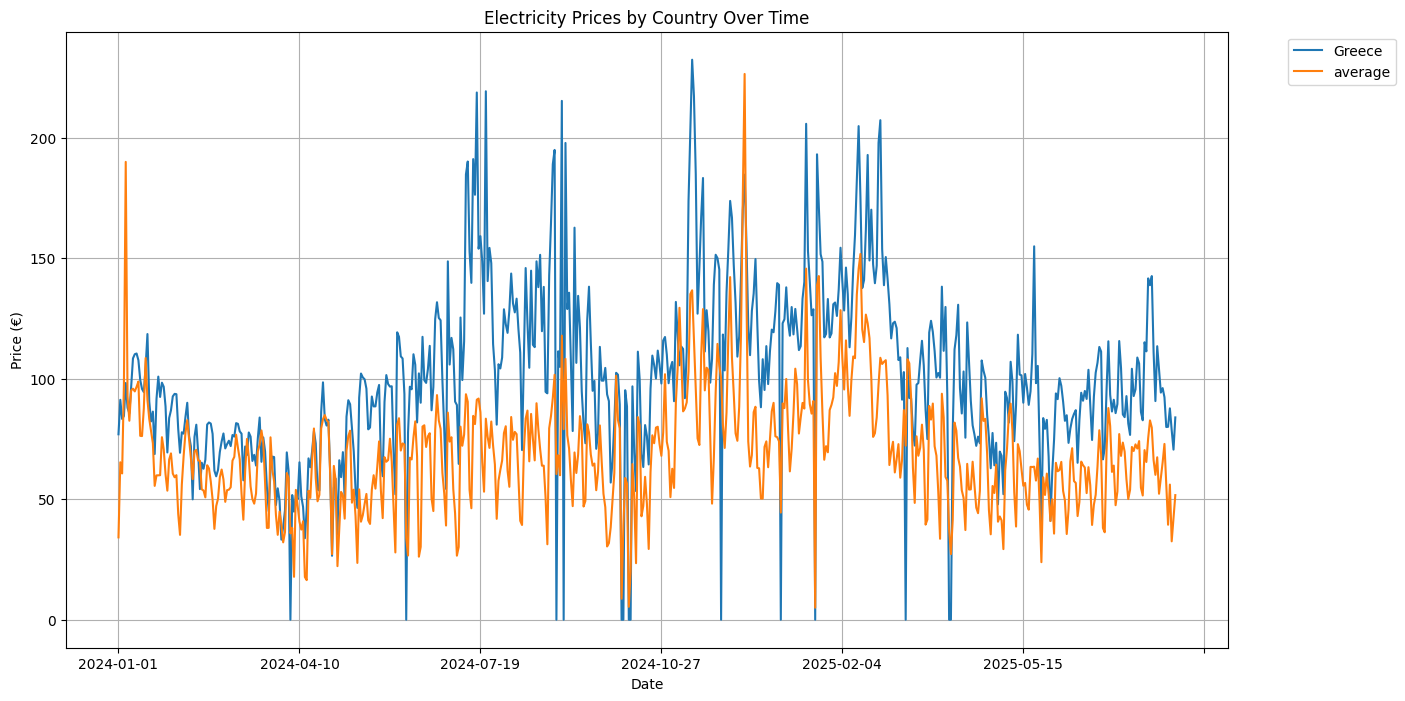

In [1]:
from bs4 import BeautifulSoup
import requests
import json
import matplotlib.pyplot as plt
import csv
import pandas as pd
from datetime import datetime


start_date = '2024-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')



date_range = pd.date_range(start=start_date, end=end_date)
country_data={}

for date in date_range:

    url = f'https://euenergy.live/?date={date.strftime("%Y-%m-%d")}'


    response = requests.get(url)


    soup = BeautifulSoup(response.text, 'html.parser')


    countries_texts=[]
    price_texts=[]
    country = soup.find_all('tr')



    country_count = 0
    price_sum = 0
    for c in country:

        country_name_tag = c.find('a', class_='country_link')
        price_tag = c.find('td', class_='price')

        if country_name_tag and price_tag:

            country_name = country_name_tag.text.strip()
            price = price_tag.text.strip()

            price= float(price)
            price_sum = price_sum + price
            if country_name == 'Ukraine':
                continue



            if country_name not in country_data:
                country_data[country_name] = {}

            country_data[country_name][date.strftime("%Y-%m-%d")] = price
        country_count += 1
        average = price_sum/country_count
        if 'average' not in country_data:
            country_data['average'] = {}
        country_data['average'] [date.strftime("%Y-%m-%d")] = average

df = pd.DataFrame(country_data).T
df = df.reindex(columns=[date.strftime("%Y-%m-%d") for date in date_range])
df = df.apply(pd.to_numeric, errors='coerce')
df.to_csv('country_prices_by_date.csv')

df_filtered = df.loc[['Greece', 'average']]
df_filtered.T.plot(figsize=(15, 8))

# df.T.plot(figsize=(15, 8))
plt.title('Electricity Prices by Country Over Time')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()




